In [10]:
import numpy as np

import scipy as sp 
from scipy.interpolate import interp1d

import matplotlib as mlp
import matplotlib.pyplot as plt

import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import camb

from tqdm import tqdm, trange
from astropy import constants as const

In [16]:
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

plt.rcParams['axes.linewidth'] = 1.4
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [4]:
data = np.loadtxt("snr_euclidModel3.txt")
mod3_x = data[:,0]
mod3_y = data[:,1]

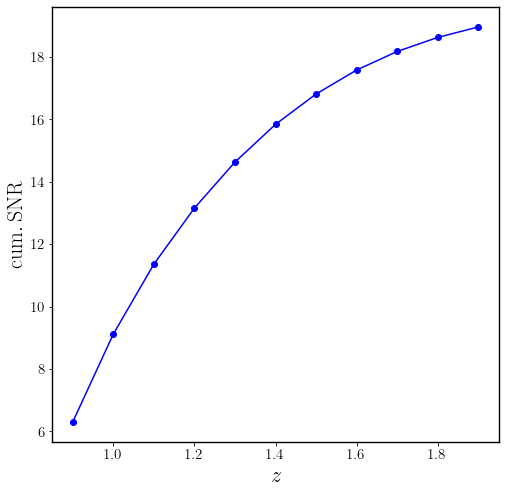

In [17]:
plt.figure(figsize=(8,8))
plt.plot(mod3_x, np.sqrt(np.cumsum(mod3_y)),marker="o",color='blue')
plt.xlabel(r"$z$",fontsize=22)
plt.ylabel(r"$\mathrm{cum.}\,\mathrm{SNR}$",fontsize=22)
plt.savefig('model3_cum.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

In [4]:
# generating and plotting just some power spectrum

#Fiducial cosmological parameters: Planck 2018
c = const.c.value


hubble = 0.6766
omegab = 0.02242 * hubble**-2 
omegac = 0.11933 * hubble**-2 
om0 = 0.3111  #omegac+omegab
H00 = 100 * hubble
Ass = 2.139e-9
nss = 0.9665
gamma = 0.545

In [8]:
#Set up the fiducial cosmology (CAMB)
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*hubble**2, omch2=omegac*hubble**2,omk=0,mnu=0)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass)
pars.set_for_lmax(2500, lens_potential_accuracy=0)

background = camb.get_background(pars)



In [11]:
#set redshift, get power spectrum from CAMB. No non-linear modelling
zbin = 1
pars.set_matter_power(redshifts=[zbin], kmax=2.0)
pars.NonLinear = camb.model.NonLinear_both

results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=2.0, npoints = 10000)
s8 = np.array(results.get_sigma8())

#Pm in, at z=Z
Pmz = interp1d(kh, (pk[0]))



In [33]:
krange = np.logspace(-3,0,100)
prange = np.array([Pmz(kk) for kk in krange])

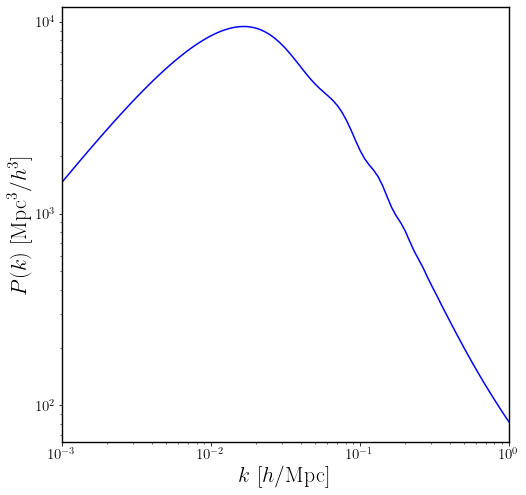

In [35]:
plt.figure(figsize=(8,8))
plt.plot(krange, prange,color='blue')
plt.xlabel(r"$k\,\,[h/\mathrm{Mpc}]$",fontsize=22)
plt.ylabel(r"$P(k)\,\,[\mathrm{Mpc}^3 / h^3]$",fontsize=22)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1)
# plt.savefig('matterpower_z1.pdf', format="pdf", bbox_inches = 'tight')
plt.show()